In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
df = pd.read_csv('../dataset/Liver_disease_data.csv')
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1700.0,50.394118,17.641915,20.000000,35.000000,51.000000,66.000000,80.000000
Gender,1700.0,0.504118,0.500130,0.000000,0.000000,1.000000,1.000000,1.000000
BMI,1700.0,27.699801,7.210400,15.004710,21.455414,27.925367,33.957668,39.992845
AlcoholConsumption,1700.0,9.832309,5.757472,0.003731,4.841811,9.828195,14.871671,19.952456
Smoking,1700.0,0.291765,0.454708,0.000000,0.000000,0.000000,1.000000,1.000000
GeneticRisk,1700.0,0.521765,0.666262,0.000000,0.000000,0.000000,1.000000,2.000000
PhysicalActivity,1700.0,5.000993,2.847074,0.001852,2.622121,5.022883,7.401642,9.994964
Diabetes,1700.0,0.142353,0.349515,0.000000,0.000000,0.000000,0.000000,1.000000
Hypertension,1700.0,0.154706,0.361730,0.000000,0.000000,0.000000,0.000000,1.000000
LiverFunctionTest,1700.0,59.863867,22.996262,20.019254,40.024216,59.513146,79.428755,99.991413


In [3]:
pd.DataFrame(df.isna().sum()).T.style.background_gradient(cmap='rainbow')

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
X = df.drop(columns='Diagnosis')
y = df['Diagnosis']

In [5]:
col_category = [col for col in X.columns if X[col].nunique() / df.shape[0] < 0.01]
col_numeric = [col for col in X.columns if col not in col_category]

col_target = "Diagnosis"

# <u>**EXPLORATORY DATA ANALYSIS (EDA)**</u>

## <u>**Univariat Plot**</u>

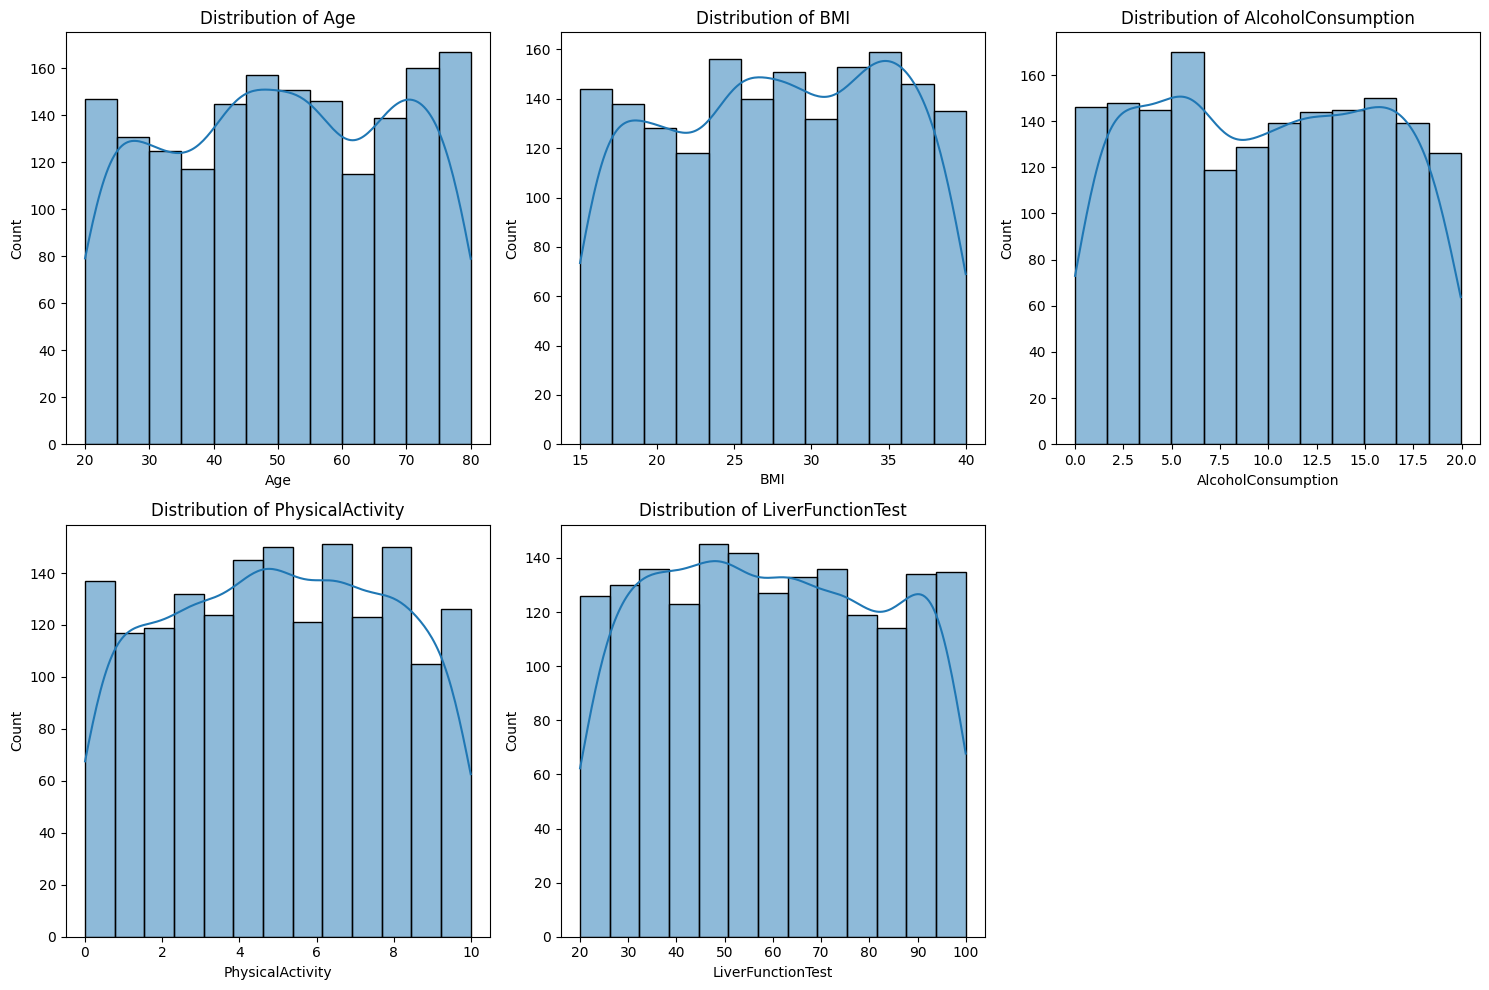

In [6]:
def numeric_univariat_plot(df, col_numeric):
    n_cols = 3
    n_rows = (len(col_numeric) + 1) // n_cols

    plt.figure(figsize=(15, 5 * n_rows))
    
    for index, numeric in enumerate(col_numeric):
        plt.subplot(n_rows, n_cols, index + 1)
        sns.histplot(df[numeric], kde=True)
        plt.title(f"Distribution of {numeric}")
        plt.xlabel(numeric)
        plt.ylabel("Count")

    plt.tight_layout()
    plt.show()


numeric_univariat_plot(df, col_numeric)

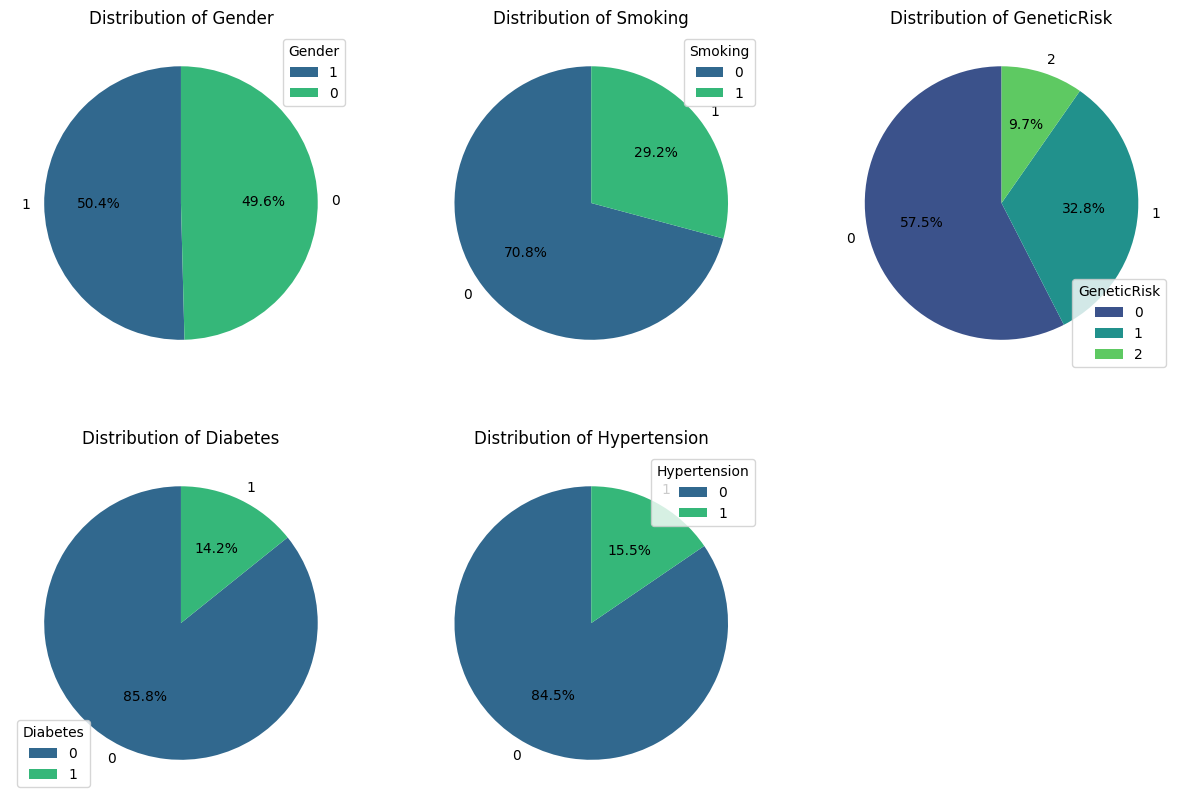

In [7]:
def category_univariat_plot(df, col_category):
    n_cols = 3
    n_rows = (len(col_category) + 1) // n_cols

    plt.figure(figsize=(15, 5 * n_rows))
    
    for index, category in enumerate(col_category):
        plt.subplot(n_rows, n_cols, index + 1)
        # sns.countplot(x=category, data=df)
        data = df[category].value_counts()
        plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(data)))
        plt.legend(title=category)
        plt.title(f"Distribution of {category}")

    plt.tight_layout
    plt.show()

category_univariat_plot(df, col_category)

## <u>**Summary Univariat Plot**</u>

The distribution of data across the numeric columns shows significant variation. The Age column exhibits a right-skewed distribution, where the frequency of ages above 50 is higher than those below 50. Meanwhile, the AlcoholConsumption column tends to be left-skewed, with alcohol consumption below 10 occurring more frequently than above 10. The BMI and PhysicalActivity columns display a multimodal distribution, evidenced by multiple peaks in their bar graphs.

For the categorical columns, the distribution of categories shows significant variation. The Gender column has a nearly even distribution between its two categories. Meanwhile, other columns like Smoking, Diabetes, and Hypertension exhibit a clear dominance for one category, with the majority of individuals falling into a single categorical group. The GeneticRisk column presents three levels with more complex variations, where the high genetic risk category (2) is the least common.

## <u>**Bivariat Plot**</u>

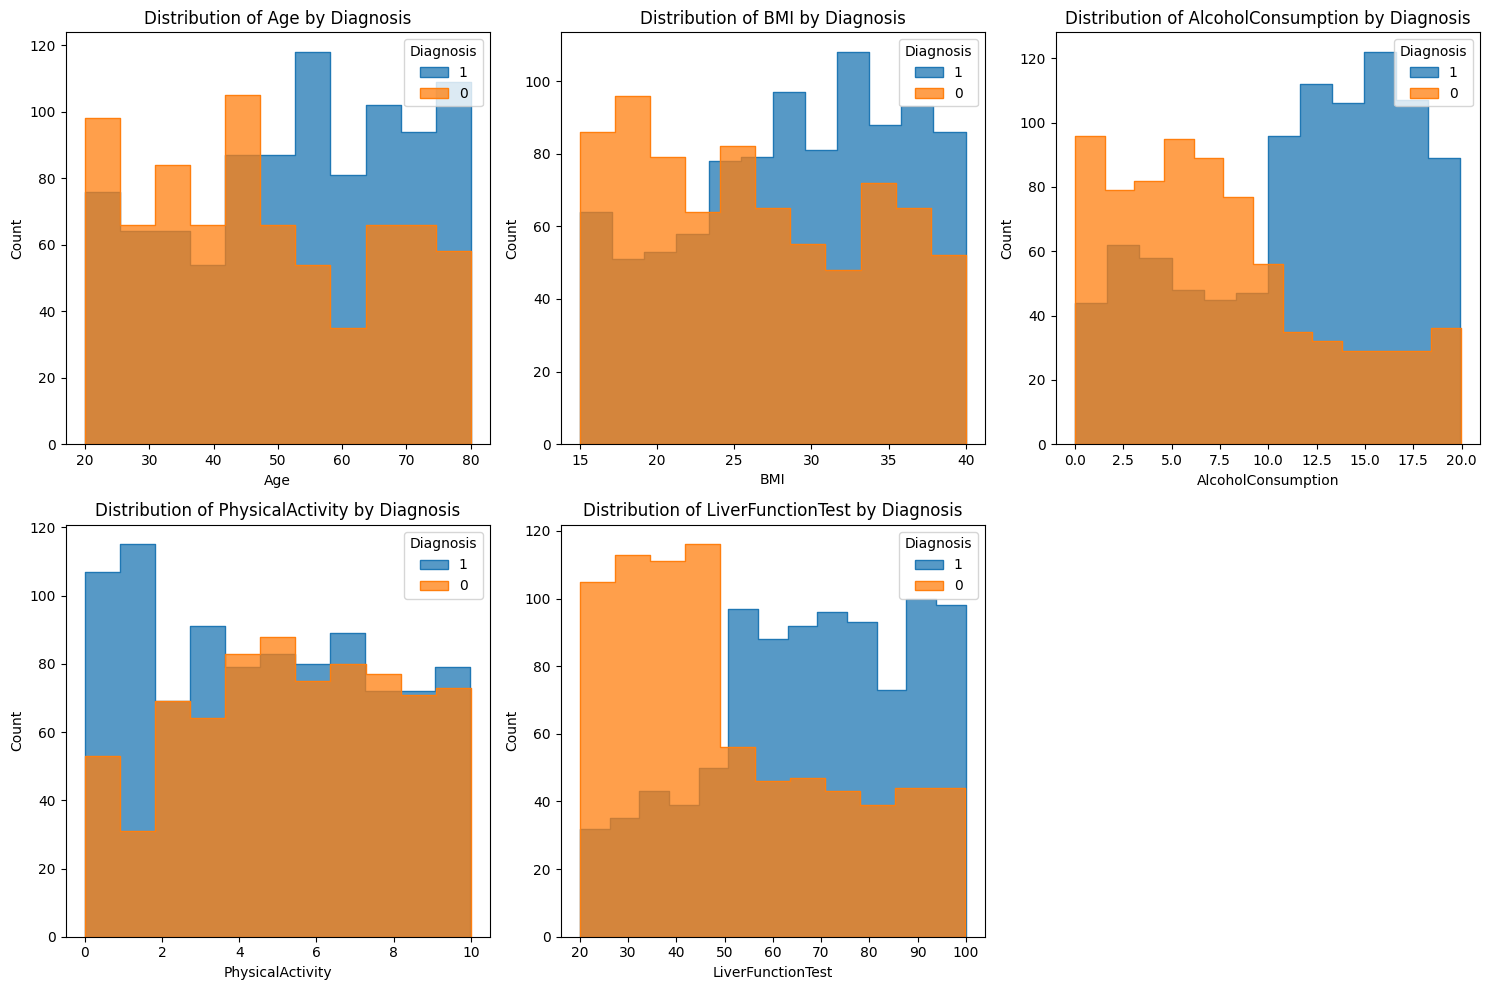

In [8]:
def numeric_bivariat_plot(df, col_numeric, col_target):
    n_cols = 3
    n_rows = (len(col_numeric) + 1) // n_cols

    plt.figure(figsize=(15, 5 * n_rows))
    
    for index, numeric in enumerate(col_numeric):
        plt.subplot(n_rows, n_cols, index + 1)
        for label in df[col_target].unique():
            sns.histplot(df[df[col_target] == label][numeric], kde=False, label=str(label), element='step')
        plt.title(f"Distribution of {numeric} by {col_target}")
        plt.xlabel(numeric)
        plt.ylabel("Count")
        plt.legend(title=col_target)

    plt.tight_layout()
    plt.show()

numeric_bivariat_plot(df, col_numeric, col_target)

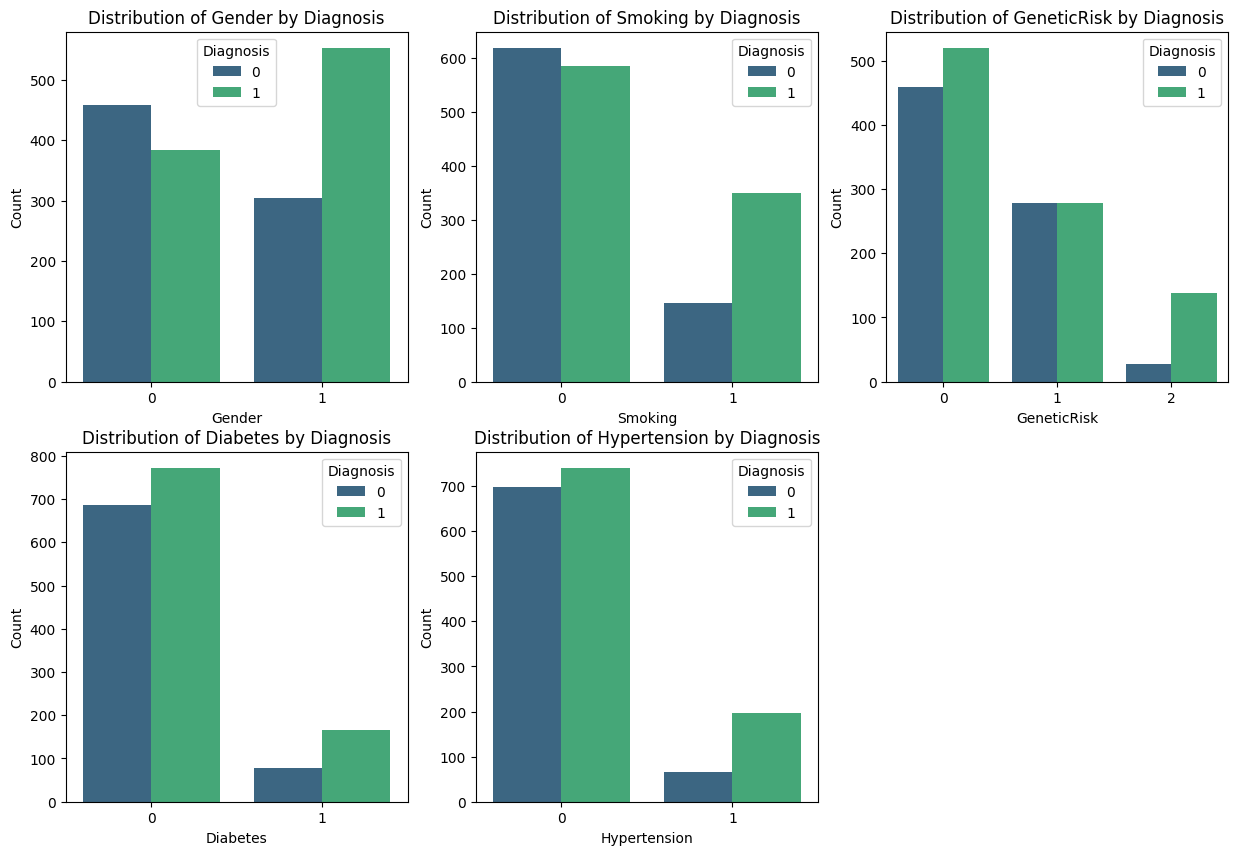

In [9]:
def category_bivariat_plot(df, col_category, col_target):
    n_cols = 3
    n_rows = (len(col_category) + 1) // n_cols

    plt.figure(figsize=(15, 5 * n_rows))
    
    for index, category in enumerate(col_category):
        plt.subplot(n_rows, n_cols, index + 1)
        sns.countplot(x=category, hue=col_target, data=df, palette='viridis')
        plt.title(f"Distribution of {category} by {col_target}")
        plt.xlabel(category)
        plt.ylabel("Count")
        plt.legend(title=col_target)

    plt.tight_layout
    plt.show()

category_bivariat_plot(df, col_category, col_target)

## <u>**Summary Bivariat Plot**</u>

In this numeric bivariate chart analysis, several patterns related to liver disease diagnosis can be concluded:
- Individuals aged over 50 tend to be diagnosed with liver disease more frequently. A similar pattern is observed with BMI, where liver disease diagnoses are more common among individuals with higher BMI values.
- For the AlcoholConsumption and LiverFunctionTest columns, it is apparent that higher levels in both variables correlate with a higher prevalence of liver disease.
- Meanwhile, in the PhysicalActivity column, higher liver disease diagnoses are seen at lower levels of physical activity.

For categorical bivariate analysis, it is observed that female individuals have a higher frequency of liver disease diagnoses compared to males. Individuals with a history of smoking, high genetic predisposition, and hypertension also show a higher tendency to suffer from liver disease. However, there is no significant correlation observed between diabetes and liver disease.

## <u>**Multivariat Plot**</u>

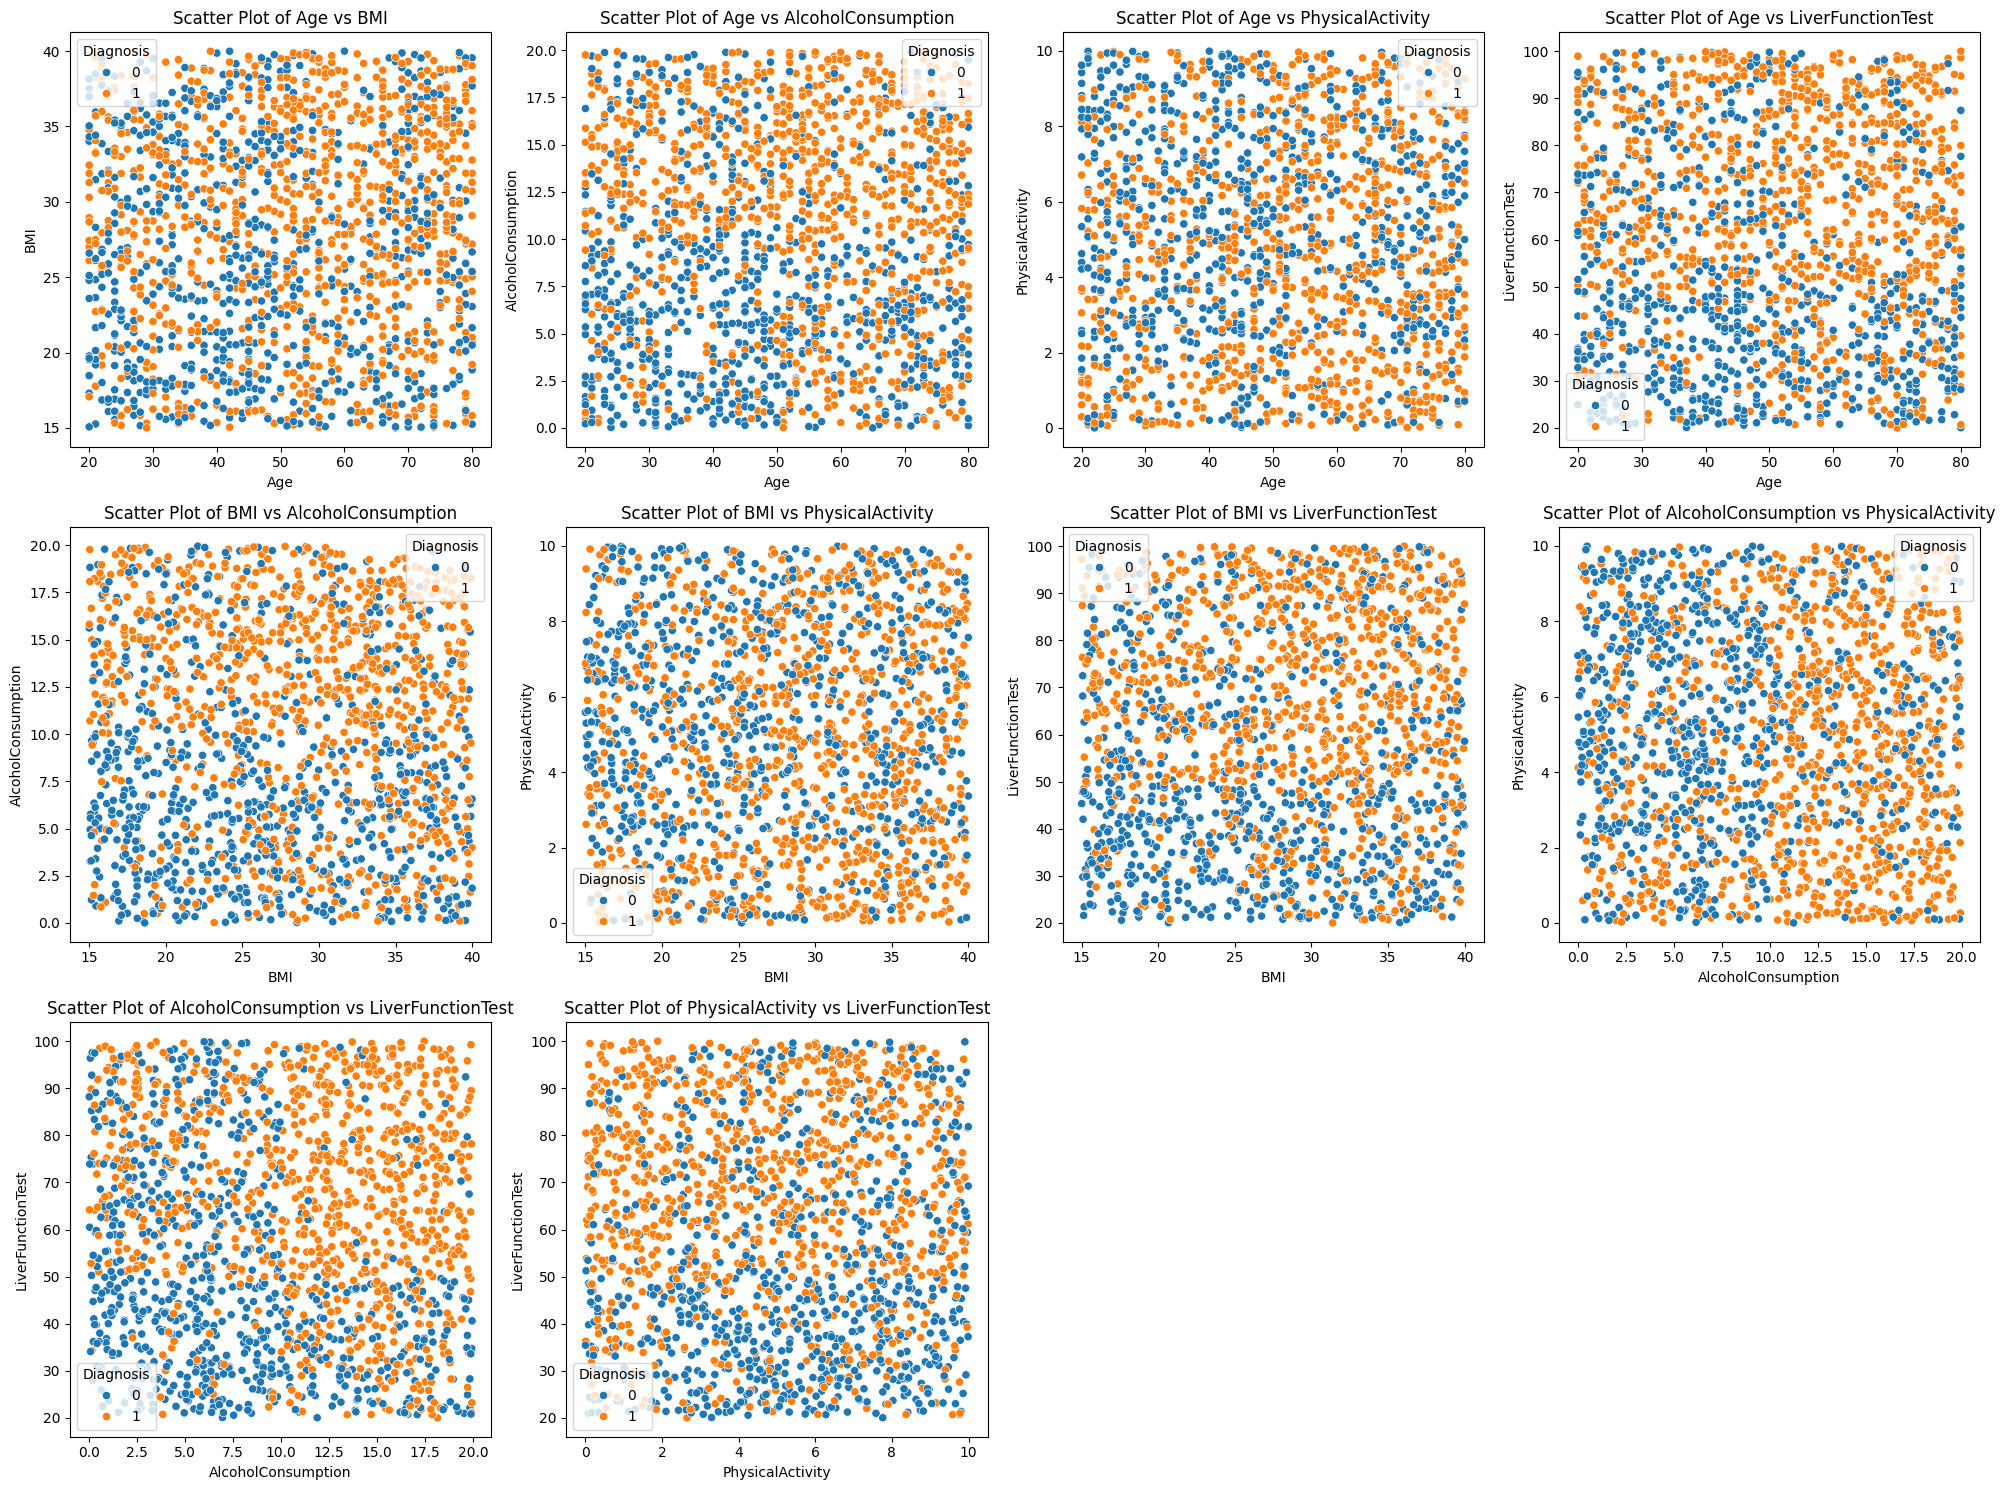

In [10]:
def num_multivariat_plot(df, col_numeric, col_target):
    n_cols = 4
    n_pairs = len(col_numeric) * (len(col_numeric) - 1) // 2
    n_rows = (n_pairs + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
    axes = axes.flatten()

    if n_rows == 1:
        axes = [axes]

    pair_index = 0
    for index_1, num_1 in enumerate(col_numeric):
        for index_2, num_2 in enumerate(col_numeric):
            if index_1 < index_2:
                ax = axes[pair_index]
                sns.scatterplot(data=df, x=num_1, y=num_2, hue=col_target, ax=ax)
                ax.set_title(f"Scatter Plot of {num_1} vs {num_2}")
                ax.set_xlabel(num_1)
                ax.set_ylabel(num_2)
                ax.legend(title=col_target)
                pair_index += 1


    # Disable unused subplot
    for i in range(pair_index, n_rows * n_cols):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()
    

num_multivariat_plot(df, col_numeric, col_target)

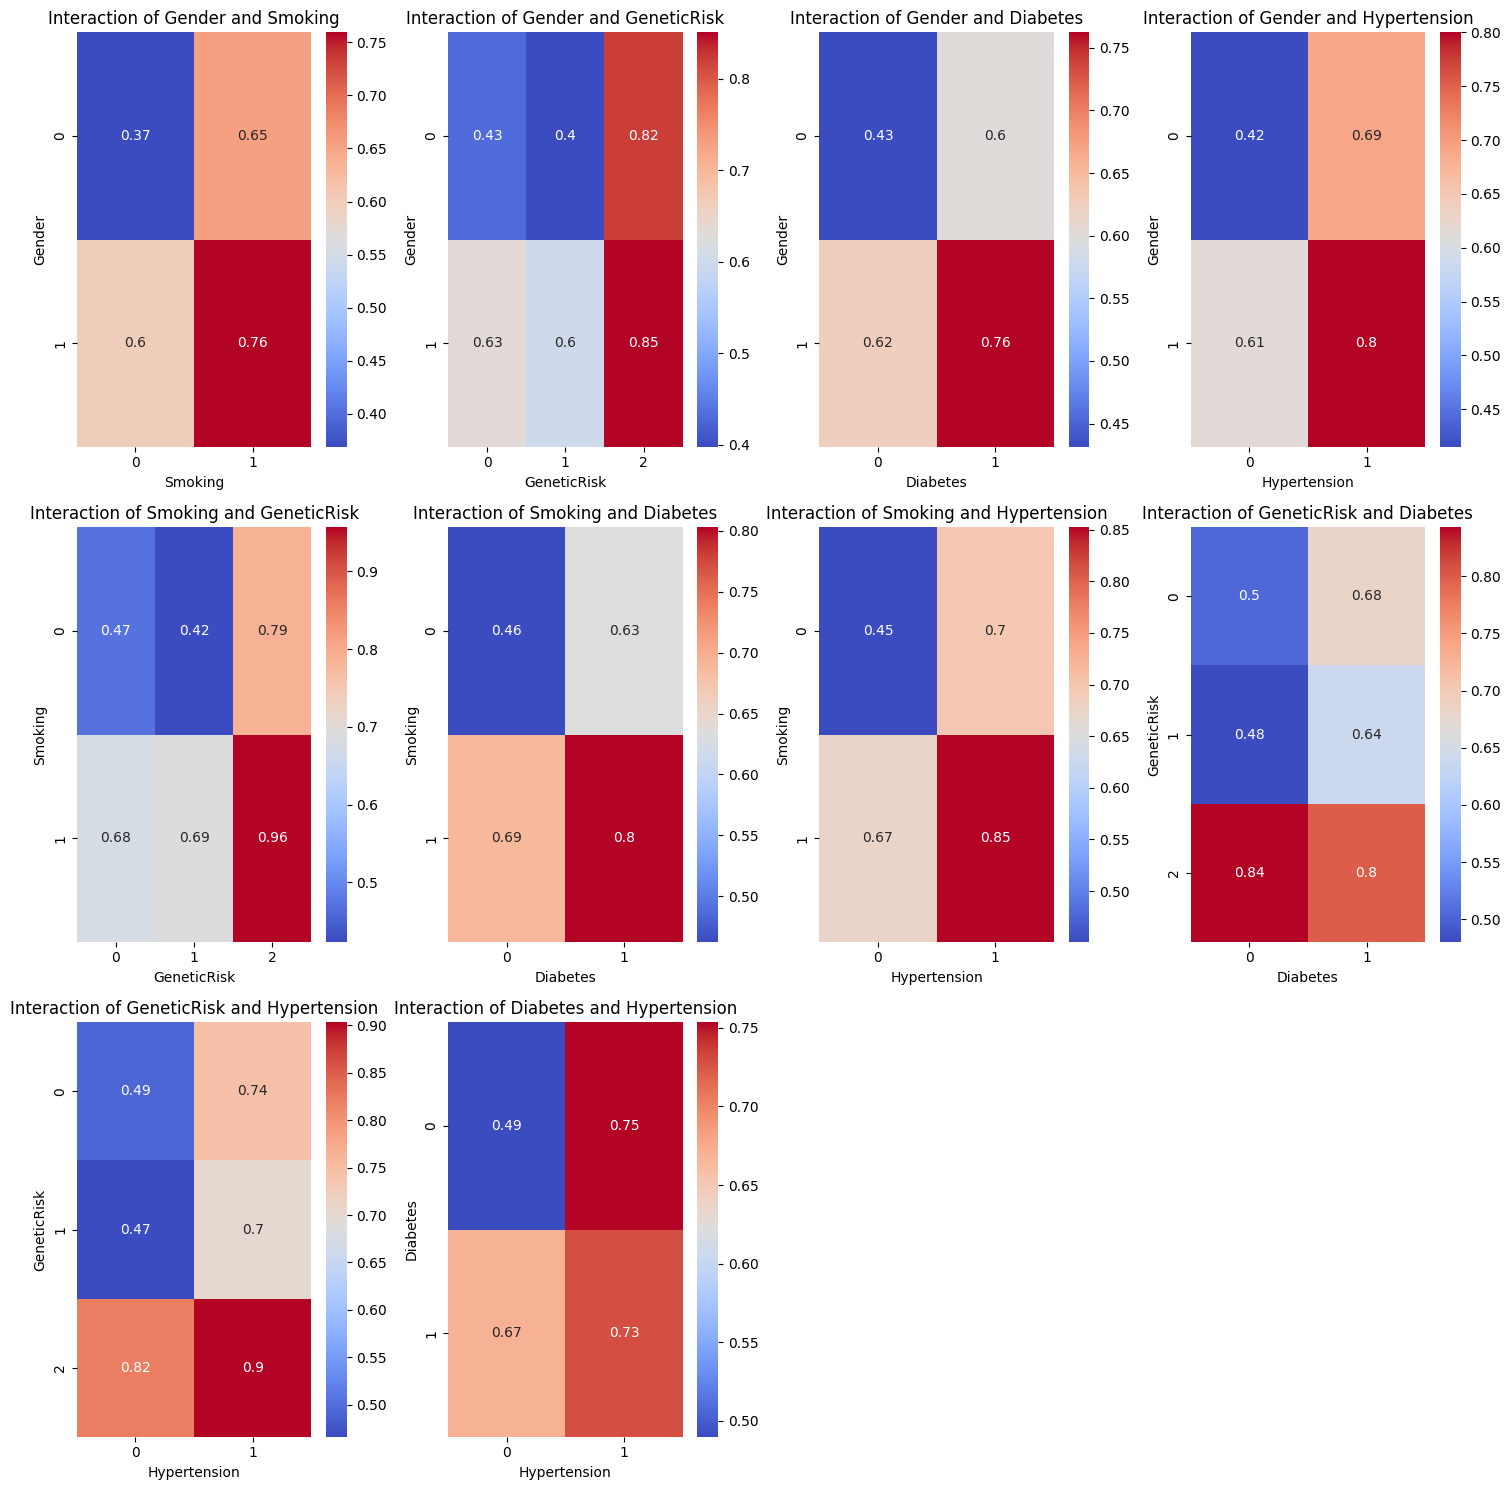

In [11]:
def cat_multivariat_plot(df, col_category, col_target):
    n_cols = 4
    n_pairs = len(col_category) * (len(col_category) - 1) // 2
    n_rows = (n_pairs + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten()

    pair_index = 0
    for index_1, cat_1 in enumerate(col_category):
        for index_2, cat_2 in enumerate(col_category):
            if index_1 < index_2:
                ax = axes[pair_index]
                cross_tab = pd.crosstab(df[cat_1], df[cat_2], values=df[col_target], aggfunc='mean')
                sns.heatmap(cross_tab, annot=True, cmap="coolwarm", ax=ax)
                ax.set_title(f"Interaction of {cat_1} and {cat_2}")
                ax.set_xlabel(cat_2)
                ax.set_ylabel(cat_1)
                pair_index += 1

    for i in range(pair_index, n_rows * n_cols):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()


cat_multivariat_plot(df, col_category, col_target)

## <u>**Summary Multivariat Plot**</u>

From the multivariate scatter plot analysis, it can be concluded:

- In the 'Age vs BMI' plot, individuals diagnosed with liver disease tend to be over 50 years old with high BMI indexes. Similar observations are found in the 'Age vs AlcoholConsumption' and 'Age vs LiverFunctionTest' plots. However, in 'Age vs PhysicalActivity', older individuals with low physical activity are more frequently diagnosed with liver disease.
- In the 'BMI vs AlcoholConsumption' plot, alcohol consumption has a greater impact than BMI on liver disease cases, with liver disease frequency increasing with higher alcohol consumption. This is also observed in the 'BMI vs LiverFunctionTest' plot, while in 'BMI vs PhysicalActivity', the distribution of liver disease diagnoses appears to be even.
- The 'AlcoholConsumption vs LiverFunctionTest' plot shows that high alcohol consumption coupled with high LiverFunctionTest values often correlates with a liver disease diagnosis. However, in 'AlcoholConsumption vs PhysicalActivity', the level of physical activity does not show a significant correlation.
- In 'PhysicalActivity vs LiverFunctionTest', individuals with low physical activity and high LiverFunctionTest values have the highest prevalence of liver disease, followed by those with high activity and high liver function tests, then low activity with low liver function tests, and finally those with high activity and low liver function tests.

The multivariate heatmap analysis reveals several important relationships:

- From the Gender interaction heatmap, women tend to have a higher incidence of liver disease, which is exacerbated by smoking habits, high genetic risk, diabetes, and hypertension.
- In the Smoking heatmap, smokers are more prone to liver disease, and this condition is worsened if they also have high genetic risk factors, diabetes, or hypertension.
- In the GeneticRisk heatmap, individuals with high genetic risk who do not suffer from diabetes have a higher prevalence of liver disease compared to those who have diabetes. In the interaction of GeneticRisk and Hypertension, individuals with hypertension tend to have liver disease.
- From the Diabetes vs Hypertension heatmap, individuals with hypertension are more likely to suffer from liver disease.

# <u>**MACHINE LEARNING - PREDICTION**</u>

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1360, 10), (340, 10), (1360,), (340,))

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from skopt.space import Real, Integer

numeric_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy='mean')),
    ("poly", PolynomialFeatures(degree=2)),
    ("scale", StandardScaler()),
])

category_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("encoder", OneHotEncoder(handle_unknown='ignore')),
])

preprocessor = ColumnTransformer([
    ("numeric", numeric_pipe, col_numeric),
    ("encoder", category_pipe, col_category),
])

In [14]:
models = {
    "SVM": SVC(),
    "RandForest": RandomForestClassifier(),
    "KNeigbbours": KNeighborsClassifier(),
    "LogReg": LogisticRegression(),
    "XGB": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "CatBoost": CatBoostClassifier(verbose=0),
    "LGBM": LGBMClassifier(),
}

scores = {}

In [15]:
for name, model in models.items():
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", model),
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    scores[name] = accuracy_score(y_test, y_pred)
    print(f"{name} accuracy: {scores[name]:.3f}")

SVM accuracy: 0.835
RandForest accuracy: 0.868
KNeigbbours accuracy: 0.791
LogReg accuracy: 0.850
XGB accuracy: 0.882
CatBoost accuracy: 0.900
[LightGBM] [Info] Number of positive: 749, number of negative: 611
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000236 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4736
[LightGBM] [Info] Number of data points in the train set: 1360, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.550735 -> initscore=0.203642
[LightGBM] [Info] Start training from score 0.203642
LGBM accuracy: 0.876


In [16]:
from skopt import BayesSearchCV

search_spaces = {
    "depth": Integer(5, 10),
    "learning_rate": Real(0.01, 0.3, prior='log-uniform'),
    "iterations": Integer(100, 1000),
    "l2_leaf_reg": Real(1, 50, prior='log-uniform'),
}

catboost_model = CatBoostClassifier(verbose=0, loss_function='Logloss')

bayes_search = BayesSearchCV(estimator=catboost_model, search_spaces=search_spaces, n_iter=32, cv=3, random_state=42, verbose=1)
bayes_search.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

BayesSearchCV(cv=3,
              estimator=<catboost.core.CatBoostClassifier object at 0x000001A0ED7A2B10>,
              n_iter=32, random_state=42,
              search_spaces={'depth': Integer(low=5, high=10, prior='uniform', transform='normalize'),
                             'iterations': Integer(low=100, high=1000, prior='uniform', transform='normalize'),
                             'l2_leaf_reg': Real(low=1, high=50, prior='log-uniform', transform='normalize'),
                             'learning_rate': Real(low=0.01, high=0.3, prior='log-uniform', transform='normalize')},
              verbose=1)

In [17]:
print(f"Best parameter: {bayes_search.best_params_}")
print(f"Best score: {bayes_search.best_score_}")

Best parameter: OrderedDict([('depth', 5), ('iterations', 1000), ('l2_leaf_reg', 49.99999999999999), ('learning_rate', 0.01)])
Best score: 0.9147095720162207


In [18]:
y_pred = bayes_search.best_estimator_.predict(X_test)

print(f"Accuracy on Test Set: {accuracy_score(y_test, y_pred)}\n")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}\n")
print(f"Classifcation Report\n {classification_report(y_test, y_pred)}")

Accuracy on Test Set: 0.9147058823529411

Confusion Matrix:
 [[142  11]
 [ 18 169]]

Classifcation Report
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       153
           1       0.94      0.90      0.92       187

    accuracy                           0.91       340
   macro avg       0.91      0.92      0.91       340
weighted avg       0.92      0.91      0.91       340



# <u>**SUMMARY MACHINE LEARNING - PREDICTION**</u>


From the model development process, it was found that the CatBoostClassifier method provided the highest accuracy among the models tested simultaneously. The accuracy achieved with the CatBoost method reached 0.9, followed by the XGBoost method with a score of 0.88, and LightGBM with a score of 0.876.

The process was continued to the fine tuning stage with the CatBoost model. Fine tuning was carried out by customizing CatBoost parameters such as depth, learning_rate, iterations, and l2_leaf_reg. The results of this tuning provided an improved accuracy value of 0.915, which is better than the previous results.